# Problem (2.54)

## Problem statement

Find the first four allowed energies (to five significant digits) for the infinite sqaure well, by wagging the dog. Hint: refer to problem 2.54, making appropriate changes to the differential equation. 

----

## Solution

The Schrodinger Equation for the ISW (inside the well) is given by equation 2.72

$$ \frac{-\hbar^2}{2m}\frac{d^2 \psi}{d x^2} = E \psi $$

In [1]:
import numpy as np
from scipy.integrate import odeint

Lets do the ground state, $\psi_1$, first

In [39]:
a = 1.0

x = np.linspace(0, 3*a, 200)

def func(y, x, E, a=a):
    
    hbar = 197.4 # eV nm/c
    m = .511e6 # eV/c^2; an electron
    
    psi, psiprime = y
    
    psidoubleprime = (-2*m)/(hbar**2)*E*psi
    
    return psiprime, psidoubleprime

In [40]:
y0 = (0.0, 1.0) #all solutions are odd for the ISW

result = odeint(func, y0, x, args=(0.5,)) 

In [41]:
from matplotlib import pyplot as plt

In [42]:
%matplotlib inline

In [43]:
result.shape

(200, 2)

In [44]:
psi = result[:,0]

In [45]:
psiprime = result[:,1]

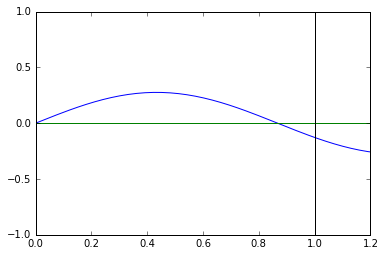

In [49]:
plt.plot(x, psi)
plt.xlim(0,1.2*a)
plt.ylim(-1,1)
plt.plot(x,np.zeros_like(x))
plt.axvline(x=a, color = 'k')

Our energy is too high, lets try a lower one

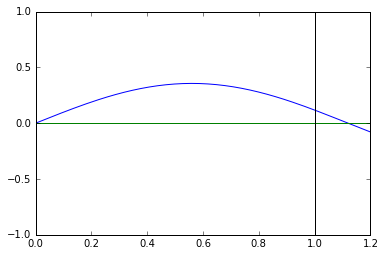

In [53]:
result = odeint(func, y0, x, args=(0.3,)) 
psi = result[:,0]
plt.plot(x, psi)
plt.xlim(0,1.2*a)
plt.ylim(-1,1)
plt.plot(x,np.zeros_like(x))
plt.axvline(x=a, color = 'k')

Too low, lets automate

In [62]:
def bisect(func, E1, E2, a=1, even=True):
    """Given two ends of an energy interval, chop it in half."""
    
    x = np.linspace(0, 2*a, 200)
    
    if even:
        y0 = (1.0, 0.0)
    else:
        y0 = (0.0, 1.0)
        
    # get initial signs
    res1 = odeint(func, y0, x, args=(E1,))
    psi1 = res1[-1,0]
    
    res2 = odeint(func, y0, x, args=(E2,))
    psi2 = res2[-1,0]
    
    Ehalf = (E1+E2)/2
    reshalf = odeint(func, y0, x, args=(Ehalf,))
    psihalf = reshalf[-1, 0]
    
    if np.sign(psihalf) == np.sign(psi1):
        return (Ehalf, E2)
    else:
        return (E1, Ehalf)
    

def find_energy(func, a, E1, E2, even=True):
    
    while abs(E1-E2) > 1.0e-14:
        E1, E2 = bisect(func, E1, E2, a, even)
        
    if even:
        y0 = (1.0, 0.0)
    else:
        y0 = (0.0, 1.0)

    x = np.linspace(0, 2*a, 200)
    result = odeint(func, y0, x, args=(E1, ))
    psi = result[:,0]
    plt.plot(x, psi)
    plt.ylim(-1.1, 1.1)
    plt.xlim(0, 1.2*a)
    plt.axvline(x=a, color = 'k')
    plt.axhline(y=0, color = 'k')
    return E1

0.37630775111855436

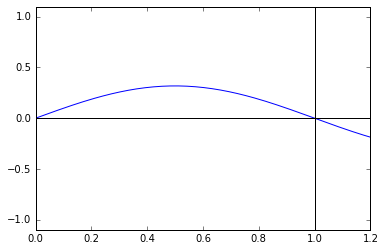

In [63]:
find_energy(func, 1.0, 0.3, 0.5, even=False)

Looks good, our output here is $E_1$

Lets do the first excited state, $\psi_2$

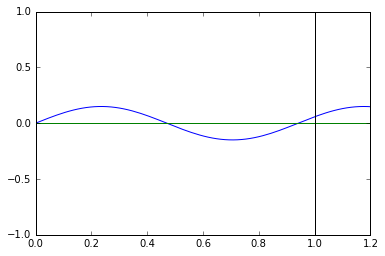

In [64]:
result = odeint(func, y0, x, args=(1.7,)) 
psi = result[:,0]
plt.plot(x, psi)
plt.xlim(0,1.2*a)
plt.ylim(-1,1)
plt.plot(x,np.zeros_like(x))
plt.axvline(x=a, color = 'k')

Too high

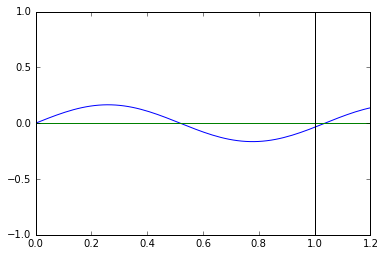

In [65]:
result = odeint(func, y0, x, args=(1.4,)) 
psi = result[:,0]
plt.plot(x, psi)
plt.xlim(0,1.2*a)
plt.ylim(-1,1)
plt.plot(x,np.zeros_like(x))
plt.axvline(x=a, color = 'k')

A little too low, now automate

1.5052309752469228

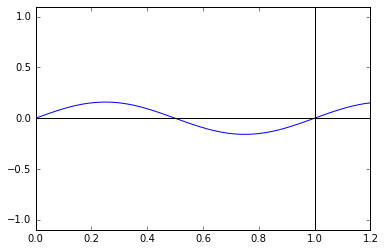

In [66]:
find_energy(func, 1.0, 1.4, 1.7, even=False)

Looks good, here is $E_2$

Now lets do the second excited state, $\psi_3$

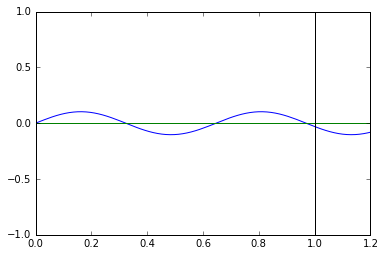

In [67]:
result = odeint(func, y0, x, args=(3.6,)) 
psi = result[:,0]
plt.plot(x, psi)
plt.xlim(0,1.2*a)
plt.ylim(-1,1)
plt.plot(x,np.zeros_like(x))
plt.axvline(x=a, color = 'k')

Too high

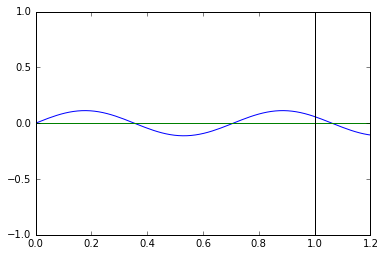

In [68]:
result = odeint(func, y0, x, args=(3.0,)) 
psi = result[:,0]
plt.plot(x, psi)
plt.xlim(0,1.2*a)
plt.ylim(-1,1)
plt.plot(x,np.zeros_like(x))
plt.axvline(x=a, color = 'k')

Too low

3.3867695515733374

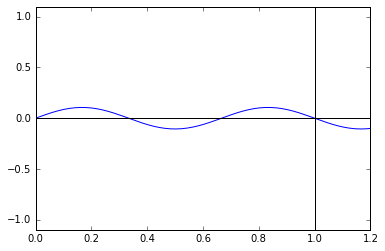

In [69]:
find_energy(func, 1.0, 3.0, 3.6, even=False)

Here is $E_3$

Now let's do $\psi_4$

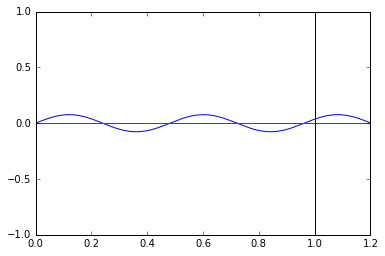

In [70]:
result = odeint(func, y0, x, args=(6.5,)) 
psi = result[:,0]
plt.plot(x, psi)
plt.xlim(0,1.2*a)
plt.ylim(-1,1)
plt.plot(x,np.zeros_like(x))
plt.axvline(x=a, color = 'k')

Too high

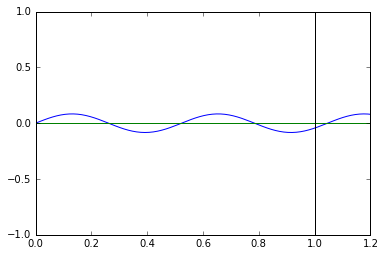

In [71]:
result = odeint(func, y0, x, args=(5.5,)) 
psi = result[:,0]
plt.plot(x, psi)
plt.xlim(0,1.2*a)
plt.ylim(-1,1)
plt.plot(x,np.zeros_like(x))
plt.axvline(x=a, color = 'k')

In [ ]:
Too low

6.020923508565552

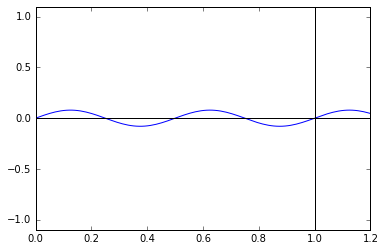

In [72]:
find_energy(func, 1.0, 5.5, 6.5, even=False)

Here is $E_4$

----

## Portfolio references
* Problem 2.55, 2.56
## Index terms
* Infinite Square Well
* Shooting
## Book references
* 
## External references
* Shooting.ipynb